(np.float64(-0.5), np.float64(381.5), np.float64(288.5), np.float64(-0.5))

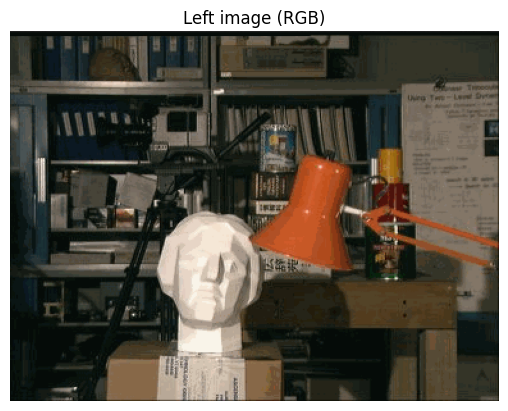

In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

BGR_image = cv2.imread("C:\\Users\\ADMIN\\Downloads\\stereo_materials\\l1.png")
RGB_image = cv2.cvtColor(BGR_image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(RGB_image)
plt.title("Left image (RGB)")
plt.axis("OFF")

(np.float64(-0.5), np.float64(381.5), np.float64(288.5), np.float64(-0.5))

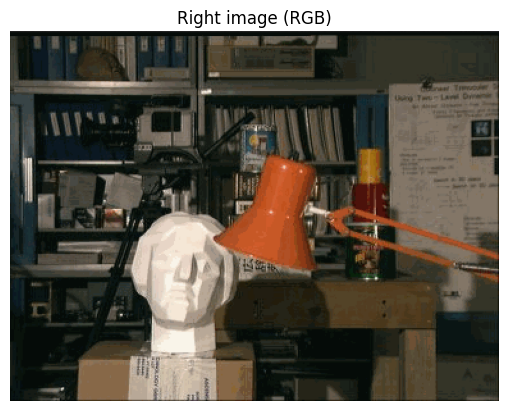

In [2]:
BGR_image2 = cv2.imread("C:\\Users\\ADMIN\\Downloads\\stereo_materials\\r1.png")
RGB_image2 = cv2.cvtColor(BGR_image2, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(RGB_image2)
plt.title("Right image (RGB)")
plt.axis("OFF")

In [15]:
left_img = cv2.imread("C:\\Users\\ADMIN\\Downloads\\stereo_materials\\l1.png", 0)
right_img = cv2.imread("C:\\Users\\ADMIN\\Downloads\\stereo_materials\\r1.png", 0)
left_img2 = cv2.imread("C:\\Users\\ADMIN\\Downloads\\stereo_materials\\l2.png", 0)
right_img2 = cv2.imread("C:\\Users\\ADMIN\\Downloads\\stereo_materials\\r2.png", 0)
left_img3 = cv2.imread("C:\\Users\\ADMIN\\Downloads\\stereo_materials\\l3.png", 0)
right_img3 = cv2.imread("C:\\Users\\ADMIN\\Downloads\\stereo_materials\\r3.png", 0)

In [16]:
print(right_img)

[[33 35 33 ... 33 35 33]
 [ 8  8  8 ...  8  8  8]
 [ 8  8  8 ...  8  8  8]
 ...
 [ 8 17 17 ... 67 67 34]
 [ 8 17 11 ... 77 77 45]
 [ 8  8  8 ... 45 50 20]]


In [17]:
def compute_d(I_l,I_r):
    return (I_l-I_r)**2 / 4

def get_diparsity_row(row,left_row,right_row):
    D = [[1] * (len(left_row)+1) for _ in range(len(right_row)+1)]
    M = [[0] * (len(left_row)+1) for _ in range(len(right_row)+1)]

    D[0][0] = compute_d(left_row[0],right_row[0])

    for i in range(1, len(left_row)+1):
        D[i][0] = i*1
    for j in range(1, len(right_row)+1):
        D[0][j] = j*1

    for j in range(1,len(right_row)+1):
        for i in range(1,len(left_row)+1):
            cost =  D[i-1][j-1] + compute_d(left_row[i-1],right_row[j-1])
            left = D[i-1][j]+1
            right = D[i][j-1]+1
            D[i][j] = min(cost,left,right)
            if(D[i][j] == cost):
                M[i][j] = 1
            elif(D[i][j] == left):
                M[i][j] = 2
            else:
                M[i][j] = 3
    return M

In [22]:
def compute_backtrack(M,p,q):
    result = [0]*p
    while(p!=0 and q!=0):
        if(M[p][q] == 1):
            p = p-1
            q = q-1
            result[p] = np.abs(p-q)
        elif(M[p][q] == 2):
            p = p-1
        elif(M[p][q] == 3):
            q = q-1
    return result

In [23]:
def plot_alignment(M):
    M = np.array(M)
    i, j = M.shape[0] - 1, M.shape[1] - 1
    fig, ax = plt.subplots(figsize=(8, 8))
    
    while i > 0 and j > 0:
        if M[i, j] ==1:
            ax.plot([j - 1, j], [i - 1, i], color='black', linewidth=0.5, marker='o', markersize=2, label='match')
            i -= 1
            j -= 1
        elif M[i, j] == 2:
            ax.plot([j, j], [i - 1, i], color='red', linewidth=0.5, marker='o', markersize=2, label='skip I_right')
            i -= 1
        else:
            ax.plot([j - 1, j], [i, i], color='blue', linewidth=0.5, marker='o', markersize=2, label='skip I_left')
            j -= 1

    ax.set_title("Optimal Alignment for Scan-line")
    ax.set_xlabel("Right Image Pixels (I_r)")
    ax.set_ylabel("Left Image Pixels (I_l)")
    ax.legend(["Match", "Skip I_right", "Skip I_left"], loc='upper left')
    ax.grid()
    leg = ax.get_legend()
    leg.legend_handles[0].set_color('black')
    leg.legend_handles[1].set_color('red')
    leg.legend_handles[2].set_color('blue')
    plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37800\2383204357.py:2: RuntimeWarning: overflow encountered in scalar subtract
  return (I_l-I_r)**2 / 4


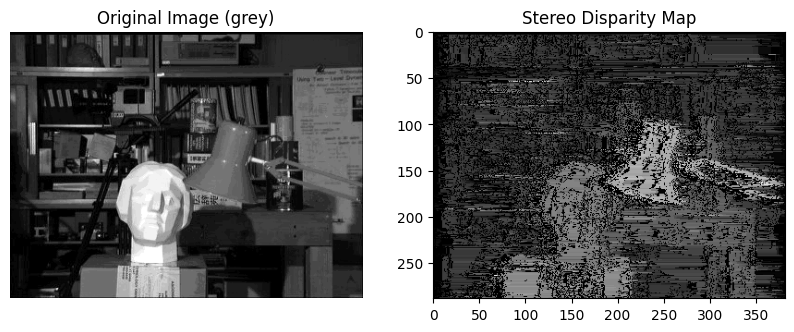

In [24]:
arr = []
for i in range(len(left_img)):
    M = get_diparsity_row(i,left_img[i],right_img[i])
    result = compute_backtrack(M,len(left_img[0]),len(right_img[0]))
    arr.append(result)

factor = 255/max(np.unique(arr))
disparity_map1 = (np.array(arr)*factor)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(left_img,cmap ="grey")
plt.title("Original Image (grey)")
plt.axis("OFF")

plt.subplot(1, 2, 2)
plt.imshow(disparity_map1, cmap="grey")
plt.title("Stereo Disparity Map")
plt.show()

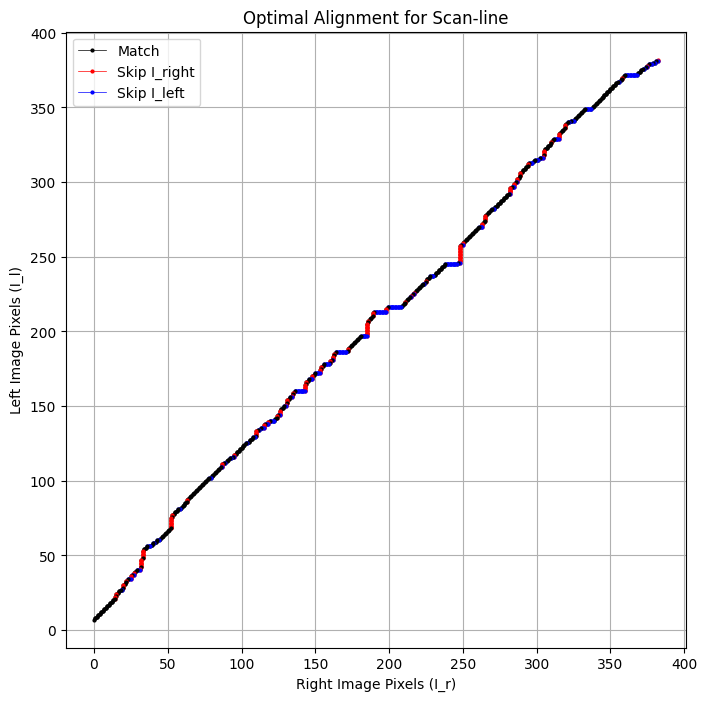

In [9]:
plot_alignment(M)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37800\2383204357.py:2: RuntimeWarning: overflow encountered in scalar subtract
  return (I_l-I_r)**2 / 4


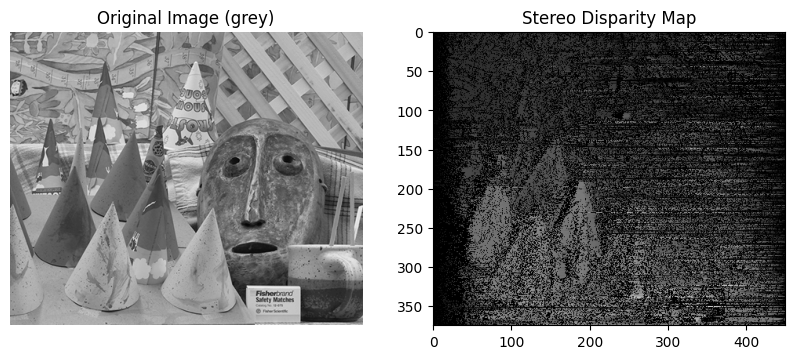

In [10]:
arr = []
for i in range(len(left_img2)):
    M = get_diparsity_row(i,left_img2[i],right_img2[i])
    result = compute_backtrack(M,len(left_img2[0]),len(right_img2[0]))
    arr.append(result)

factor = 255/max(np.unique(arr))
disparity_map2 = (np.array(arr)*factor)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(left_img2,cmap ="grey")
plt.title("Original Image (grey)")
plt.axis("OFF")

plt.subplot(1, 2, 2)
plt.imshow(disparity_map2, cmap="grey")
plt.title("Stereo Disparity Map")
plt.show()

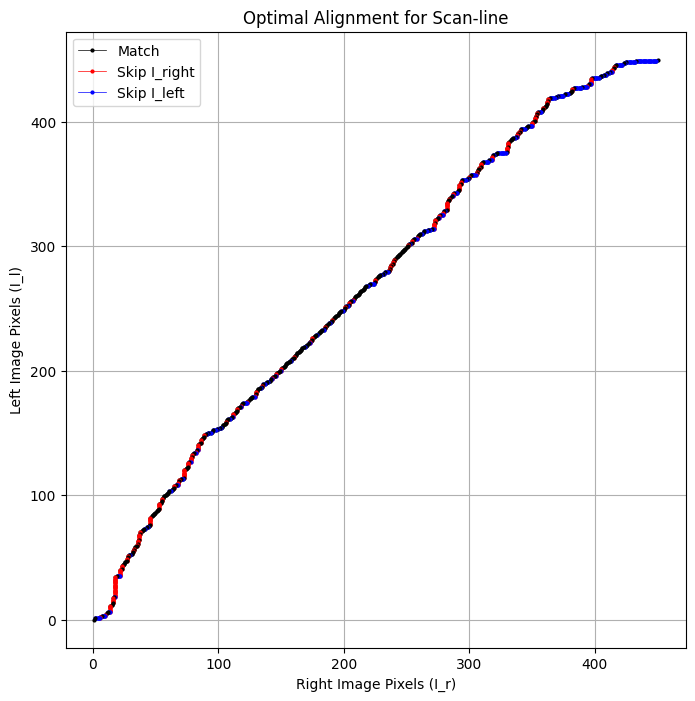

In [11]:
plot_alignment(M)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37800\2383204357.py:2: RuntimeWarning: overflow encountered in scalar subtract
  return (I_l-I_r)**2 / 4


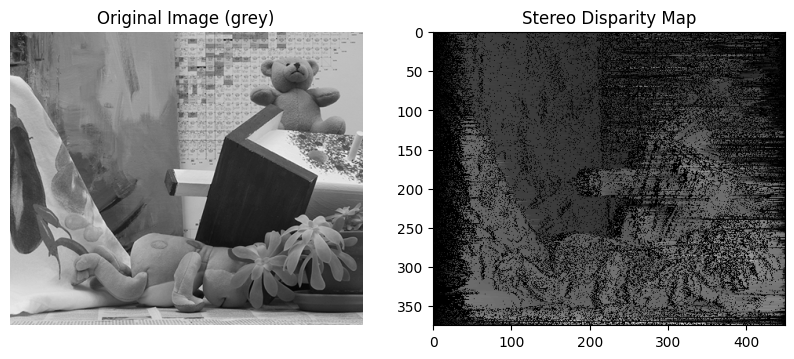

In [12]:
arr = []
for i in range(len(left_img3)):
    M = get_diparsity_row(i,left_img3[i],right_img3[i])
    result = compute_backtrack(M,len(left_img3[0]),len(right_img3[0]))
    arr.append(result)

factor = 255/max(np.unique(arr))
disparity_map3 = (np.array(arr)*factor)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(left_img3,cmap ="grey")
plt.title("Original Image (grey)")
plt.axis("OFF")

plt.subplot(1, 2, 2)
plt.imshow(disparity_map3, cmap="grey")
plt.title("Stereo Disparity Map")
plt.show()

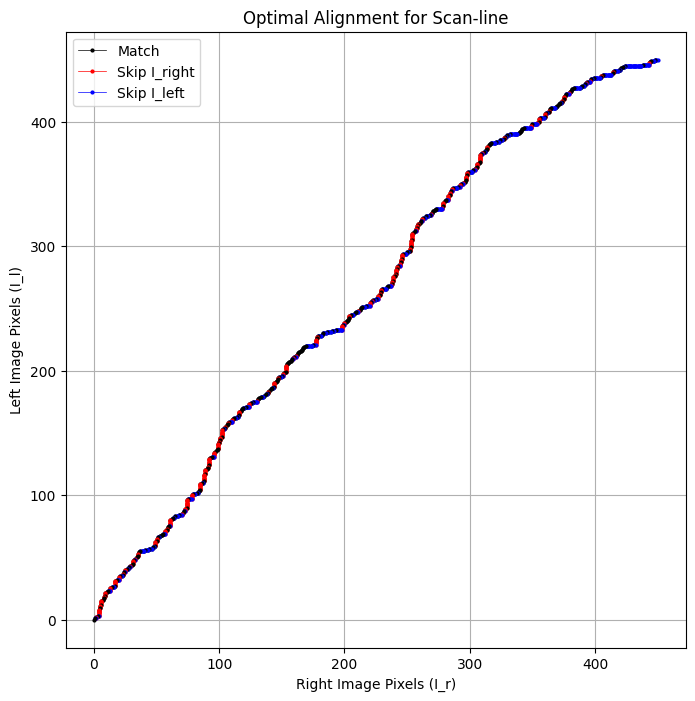

In [13]:
plot_alignment(M)